In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def CriticalStateFunction(mu=0.6):
    return (np.sqrt(mu**2 + 1) + mu)**2

In [3]:
def StressPolygon(Sv, Pp, mu=0.6, figsize=[8, 8]):
    f_mu = CriticalStateFunction(mu)
    1/f_mu * Sv + (1-1/f_mu)*Pp
    Svline = np.array([0, 4*Sv])
    Sh = np.array([0, 4*Sv])
    # Normal Fault Triangle
    Sh_lowbnd_n = 1/f_mu * Sv + (1-1/f_mu)*Pp
    SH_upbnd_n = Sv
    
    # Strik Slip Fault Triangle
    SH_lowbnd_ss = Sv
    SH_upbnd_ss = f_mu*np.array([Sh_lowbnd_n, Sv]) + (1-f_mu)*Pp
    Sh_upbnd_ss = Sv
    
    # Reverse Fault Triangle
    Sh_lowbnd_r = Sv
    SH_upbnd_r = f_mu*Sv + (1-f_mu)*Pp
    
    # Create Figure
    fig, ax = plt.subplots(figsize=figsize)
    fig.suptitle('Bounds of SH & Sh')
    ax.plot(Sh, Svline, color='blue')
    
    # Plot Normal Fault Triangle
    ax.vlines(Sh_lowbnd_n, Sh_lowbnd_n, Sv, color='blue')
    ax.hlines(SH_upbnd_n, Sh_lowbnd_n, Sv, color='blue')
    normal = ax.fill_between([Sh_lowbnd_n, Sv], y1=[Sv, Sv], y2=[Sh_lowbnd_n, Sv], alpha=0.3, color='red')
    
    # Plot Strike Slip Fault Triangle
    ax.plot([Sh_lowbnd_n, Sv], SH_upbnd_ss, color='blue')
    ax.vlines(Sv, Sv, SH_upbnd_ss[-1], color='blue')
    strikeslip = ax.fill_between([Sh_lowbnd_n, Sv], y1=SH_upbnd_ss, y2=[Sv, Sv], alpha=0.3, color='green')
    
    # Plot Reverse Fault Triangle
    plt.hlines(SH_upbnd_r, Sv, SH_upbnd_r, color='blue')
    reverse = ax.fill_between([Sv, SH_upbnd_r], y1=[SH_upbnd_r, SH_upbnd_r], y2=[Sv, SH_upbnd_r], alpha=0.3, color='orange')
    
    ax.grid()
    ax.set_title(f'Sv={Sv} & Pp={Pp}')
    ax.set_xlabel('Sh')
    ax.set_ylabel('SH')
    
    ax.set_xlim(0, 1.1*SH_upbnd_r)
    ax.set_ylim(0, 1.1*SH_upbnd_r)
    
    legend1 = ax.legend(handles=[normal, strikeslip, reverse], 
                        labels=['Normal Falut', 'Strike Slip Fault', 'Reverse Fault'], 
                        loc='lower right')
    
    ax.add_artist(legend1)

    return ax

In [4]:
def StressPolygonAdjusted(Sv, Pp, Pm, C0, wbo, mu=0.6, figsize=[8, 8], T0=0, sigmaT=0):
    ax = StressPolygon(Sv, Pp, mu=0.6, figsize=figsize)
    
    f_mu = CriticalStateFunction(mu)
    lb = 1/f_mu * Sv + (1-1/f_mu)*Pp
    x = np.linspace(0.9*lb, 1.2*Sv, 2)
    
    y = 3*x - 2*Pp - (Pm-Pp) + T0 - sigmaT      
    ax.plot(x, y, label=f'(Pm-Pp)={Pm-Pp}')
    
    
    tb = np.deg2rad(90-wbo/2)
    x2 = np.linspace(0.9*lb, 0.9*ax.get_xlim()[1])
    
    def helper(co):
        y2 = (co + 2*Pp + (Pm-Pp) + sigmaT)/(1-2*np.cos(2*tb)) - (1+2*np.cos(2*tb))/(1-2*np.cos(2*tb)) * x2
        ax.plot(x2, y2, label=f'Wbo={wbo} Co={co}')
        
    try:
        for co in C0:
            helper(co)
    except:
        helper(C0)  
    
    legend2 = ax.legend(loc='upper left')
    ax.add_artist(legend2)

In [5]:
Sv=11000
Pp=4400
Pm=5900
C0=14000
T0=0
wbo=5
sigmaT = 0

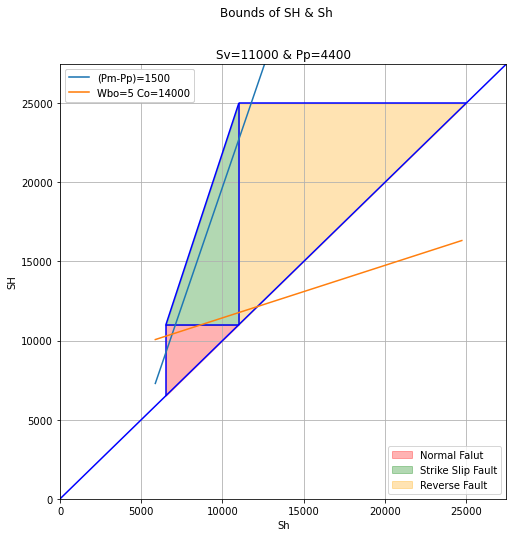

In [6]:
StressPolygonAdjusted(Sv=Sv, Pp=Pp, Pm=Pm, C0=C0, T0=T0, wbo=wbo)

In [7]:
f_mu = CriticalStateFunction(mu=0.6)

#### Point 1

In [8]:
# Point 1

Sh = 1/f_mu * Sv + (1-1/f_mu)*Pp


tb = np.pi-wbo
SH = (C0 + 2*Pp + (Pm-Pp) + sigmaT)/(1-2*np.cos(2*tb)) - (1+2*np.cos(2*tb))/(1-2*np.cos(2*tb)) * Sh

print(f'Sh = {Sh}')
print(f'SH = {SH}')

Sh = 6515.772198565044
SH = 10723.335184629606


#### Point 2

In [9]:
def f(x):
    return x - ((C0 + 2*Pp + (Pm-Pp) + sigmaT)/(1-2*np.cos(2*tb)) - (1+2*np.cos(2*tb))/(1-2*np.cos(2*tb)) * x)

from scipy.optimize import fsolve

Sh = fsolve(f, 11000)
print(f'Sh = {Sh}')
print(f'SH = {SH}')

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Sh = [12150.]
SH = 10723.335184629606


#### Point 3

In [10]:
Sh = 1/f_mu * Sv + (1-1/f_mu)*Pp
SH = 3*Sh - 2*Pp - (Pm-Pp) + T0 - sigmaT 

print(f'Sh = {Sh}')
print(f'SH = {SH}')

Sh = 6515.772198565044
SH = 9247.316595695134


#### Point 4

In [11]:
SH = f_mu*Sv + (1-f_mu)*Pp

def f(Sh):
    return 3*Sh - 2*Pp - (Pm-Pp) + T0 - sigmaT - SH

Sh = fsolve(f, 10000)

print(f'Sh = {Sh}')
print(f'SH = {SH}')

Sh = [11762.74260048]
SH = 24988.22780143495


#### Point 5

In [12]:
def f(Sh):
    y_ucs = (C0 + 2*Pp + (Pm-Pp) + sigmaT)/(1-2*np.cos(2*tb)) - (1+2*np.cos(2*tb))/(1-2*np.cos(2*tb)) * Sh
    y_tensilefrac = 3*Sh - 2*Pp - (Pm-Pp) + T0 
    return y_ucs - y_tensilefrac

Sh = fsolve(f, 6000)
SH = (C0 + 2*Pp + (Pm-Pp) + sigmaT)/(1-2*np.cos(2*tb)) - (1+2*np.cos(2*tb))/(1-2*np.cos(2*tb)) * Sh

print(f'Sh = {Sh}')
print(f'SH = {SH}')

Sh = [7053.13424174]
SH = [10859.40272523]
